<a href="https://colab.research.google.com/github/tejashwinimoger11/fake-news/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the dataset path
dataset_path = '/content/drive/My Drive/dataset1/Fake/True'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [ ]:
fake = pd.read_csv("/content/drive/My Drive/dataset1/Fake.csv")
true = pd.read_csv("/content/drive/My Drive/dataset1/True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Combine datasets
data = pd.concat([fake, true]).reset_index(drop=True)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,In the battle for Hollywood endorsements - and...,LOS ANGELES (Reuters) - Democratic presidentia...,politicsNews,"April 26, 2016",true
1,Henningsen: Obama White House Colluded with Fa...,WASHINGTON DC This week the Senate Intellige...,Middle-east,"October 6, 2017",fake
2,BUSTED: Fox News Worked With Trump To Circula...,"Psst! Hey, Donald Trump, the fake news you r...",News,"August 1, 2017",fake
3,Two former presidents of Mexico compare Trump ...,MEXICO CITY (Reuters) - U.S. Republican presid...,politicsNews,"February 28, 2016",true
4,Trump Viciously Attacks Reporter For Cornerin...,Donald Trump is back to shutting down reporter...,News,"May 18, 2017",fake


In [ ]:
# Removing the date
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,In the battle for Hollywood endorsements - and...,LOS ANGELES (Reuters) - Democratic presidentia...,politicsNews,true
1,Henningsen: Obama White House Colluded with Fa...,WASHINGTON DC This week the Senate Intellige...,Middle-east,fake
2,BUSTED: Fox News Worked With Trump To Circula...,"Psst! Hey, Donald Trump, the fake news you r...",News,fake
3,Two former presidents of Mexico compare Trump ...,MEXICO CITY (Reuters) - U.S. Republican presid...,politicsNews,true
4,Trump Viciously Attacks Reporter For Cornerin...,Donald Trump is back to shutting down reporter...,News,fake


In [ ]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,LOS ANGELES (Reuters) - Democratic presidentia...,politicsNews,true
1,WASHINGTON DC This week the Senate Intellige...,Middle-east,fake
2,"Psst! Hey, Donald Trump, the fake news you r...",News,fake
3,MEXICO CITY (Reuters) - U.S. Republican presid...,politicsNews,true
4,Donald Trump is back to shutting down reporter...,News,fake


In [ ]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,los angeles (reuters) - democratic presidentia...,politicsNews,true
1,washington dc this week the senate intellige...,Middle-east,fake
2,"psst! hey, donald trump, the fake news you r...",News,fake
3,mexico city (reuters) - u.s. republican presid...,politicsNews,true
4,donald trump is back to shutting down reporter...,News,fake


In [ ]:
# Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,los angeles reuters democratic presidential c...,politicsNews,true
1,washington dc this week the senate intellige...,Middle-east,fake
2,psst hey donald trump the fake news you rage...,News,fake
3,mexico city reuters us republican presidentia...,politicsNews,true
4,donald trump is back to shutting down reporter...,News,fake


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,los angeles reuters democratic presidential ca...,politicsNews,true
1,washington dc week senate intelligence committ...,Middle-east,fake
2,psst hey donald trump fake news ragetweet comi...,News,fake
3,mexico city reuters us republican presidential...,politicsNews,true
4,donald trump back shutting reporters trying ge...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


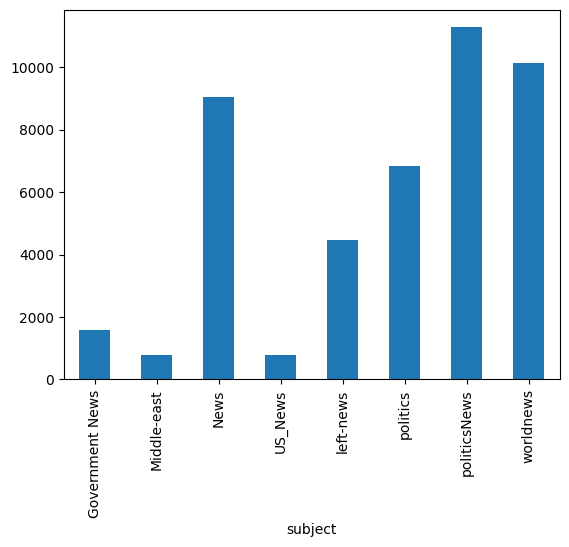

In [ ]:
#How many articles per subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


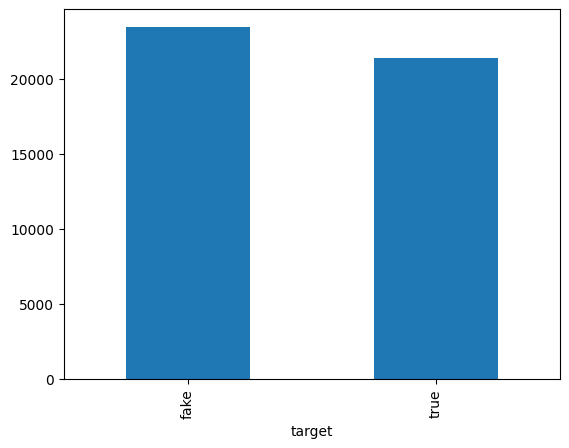

In [ ]:
# How many fake and real articles
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()


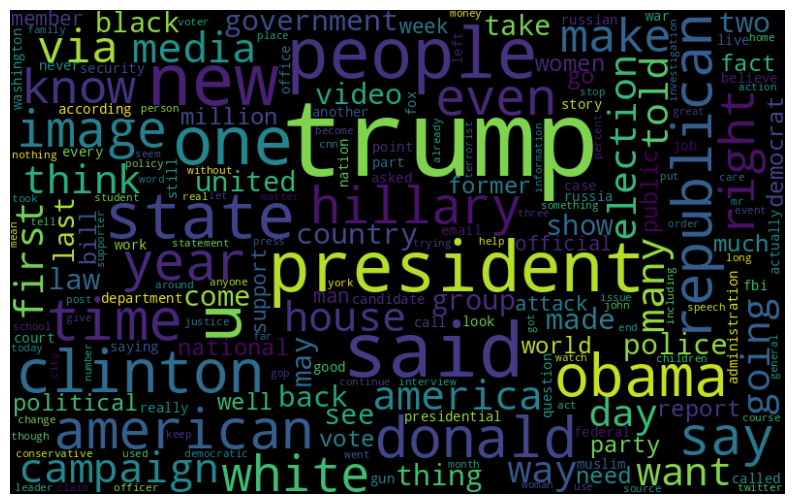

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

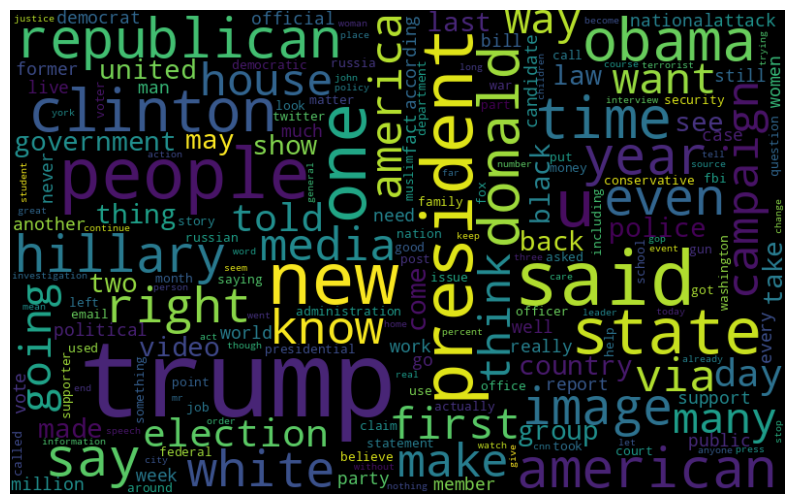

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

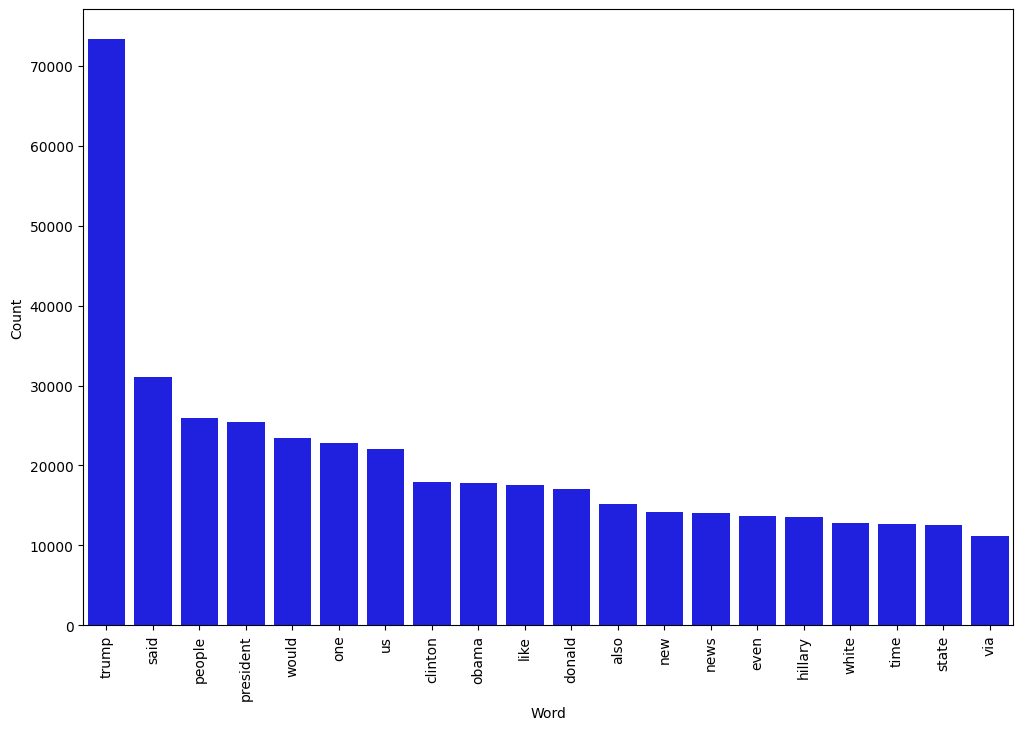

In [ ]:
counter(data[data["target"] == "fake"], "text", 20)

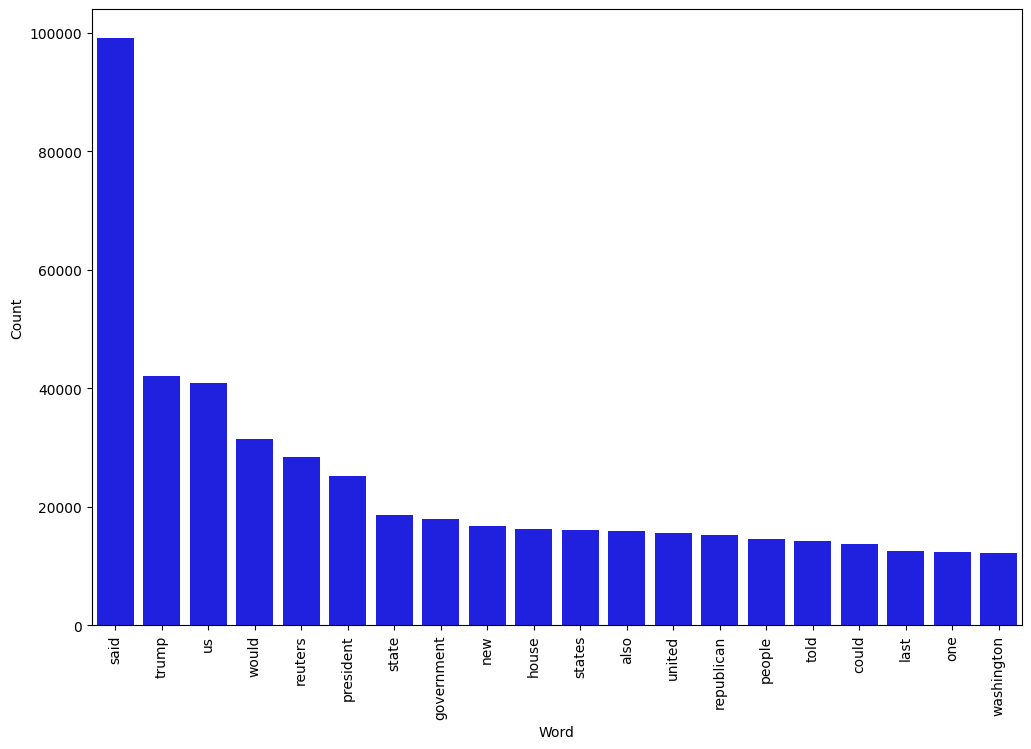

In [ ]:
counter(data[data["target"] == "true"], "text", 20)

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a Naive Bayes classifier
NB_classifier = MultinomialNB()

# Pipeline for Naive Bayes
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predictions
prediction = model.predict(X_test)

# Metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = round(precision_score(y_test, prediction, pos_label="fake") * 100, 2)
recall = round(recall_score(y_test, prediction, pos_label="fake") * 100, 2)

# Print Results
print(f"Naive Bayes Accuracy: {accuracy}%")
print(f"Naive Bayes Precision: {precision}%")
print(f"Naive Bayes Recall: {recall}%")

# Initialize dictionary
dct = {}

# Add metrics to dictionary
dct['Naive Bayes'] = accuracy
dct['Naive Bayes Precision'] = precision
dct['Naive Bayes Recall'] = recall


Naive Bayes Accuracy: 95.23%
Naive Bayes Precision: 96.65%
Naive Bayes Recall: 94.24%


Confusion matrix, without normalization


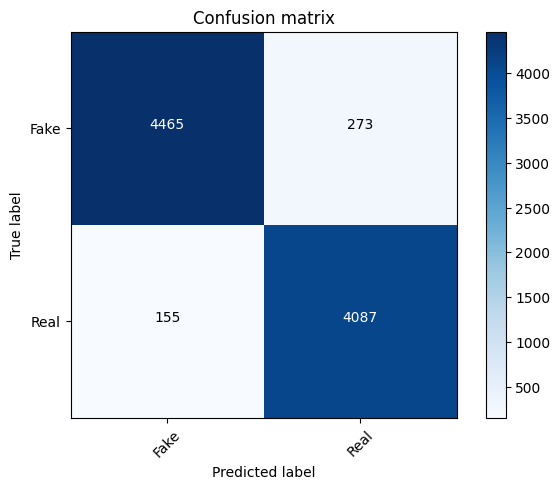

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Pipeline for Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predictions
prediction = model.predict(X_test)

# Metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = round(precision_score(y_test, prediction, pos_label="fake") * 100, 2)
recall = round(recall_score(y_test, prediction, pos_label="fake") * 100, 2)

# Print Results
print(f"Logistic Regression Accuracy: {accuracy}%")
print(f"Logistic Regression Precision: {precision}%")
print(f"Logistic Regression Recall: {recall}%")

# Add metrics to dictionary
dct['Logistic Regression'] = accuracy
dct['Logistic Regression Precision'] = precision
dct['Logistic Regression Recall'] = recall


Logistic Regression Accuracy: 98.88%
Logistic Regression Precision: 98.94%
Logistic Regression Recall: 98.92%


Confusion matrix, without normalization


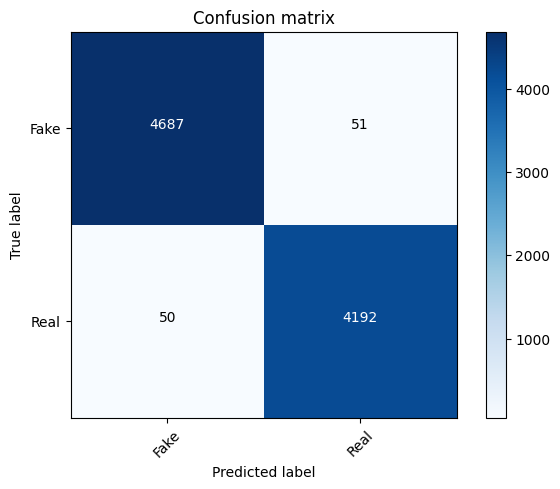

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#suppot vector machine
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create an SVM classifier with linear kernel
clf = svm.SVC(kernel='linear', random_state=42)

# Pipeline for SVM
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predictions
prediction = model.predict(X_test)

# Metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = round(precision_score(y_test, prediction, pos_label="fake") * 100, 2)
recall = round(recall_score(y_test, prediction, pos_label="fake") * 100, 2)

# Print Results
print(f"SVM Accuracy: {accuracy}%")
print(f"SVM Precision: {precision}%")
print(f"SVM Recall: {recall}%")

# Add metrics to dictionary
dct['SVM'] = accuracy
dct['SVM Precision'] = precision
dct['SVM Recall'] = recall


SVM Accuracy: 99.62%
SVM Precision: 99.75%
SVM Recall: 99.54%


Confusion matrix, without normalization


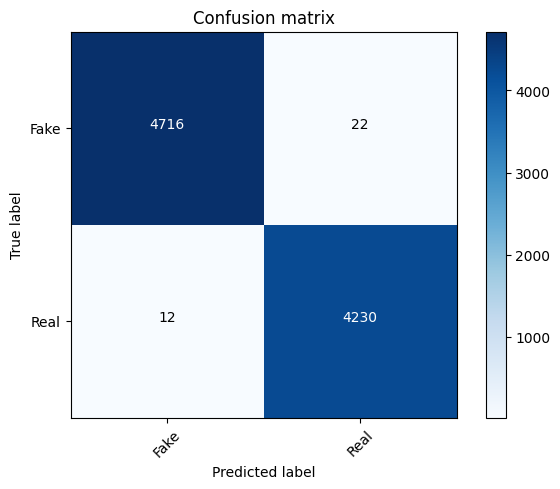

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

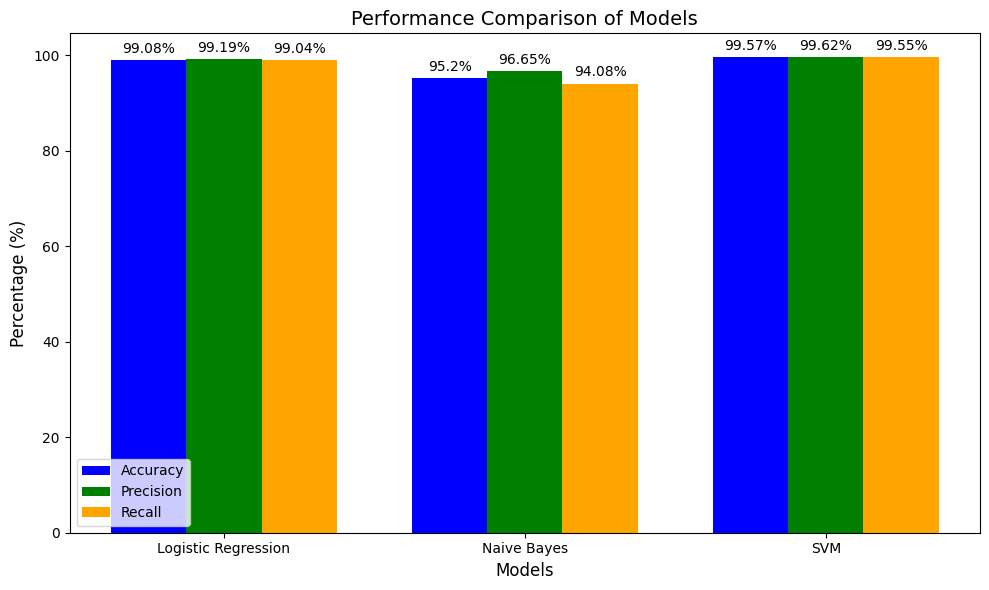

In [ ]:
#Comparing Different Models
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store metrics for each model
metrics = {
    'Logistic Regression': {
        'Accuracy': 99.08,
        'Precision': 99.19,
        'Recall': 99.04
    },
    'Naive Bayes': {
        'Accuracy': 95.2,
        'Precision': 96.65,
        'Recall': 94.08
    },
    'SVM': {
        'Accuracy': 99.57,
        'Precision': 99.62,
        'Recall': 99.55
    }
}

# Prepare data for plotting
models = list(metrics.keys())
accuracy = [metrics[model]['Accuracy'] for model in models]
precision = [metrics[model]['Precision'] for model in models]
recall = [metrics[model]['Recall'] for model in models]

x = np.arange(len(models))  # Label locations
width = 0.25  # Width of the bars

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='blue')
bars2 = ax.bar(x, precision, width, label='Precision', color='green')
bars3 = ax.bar(x + width, recall, width, label='Recall', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Performance Comparison of Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

# Add value annotations on bars
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_annotations(bars1)
add_annotations(bars2)
add_annotations(bars3)

# Show the plot
plt.tight_layout()
plt.show()





In [ ]:
# Function to clean text: convert to lowercase, remove punctuation, and stopwords
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop])

    return text
    # Apply the cleaning function to the 'text' column
data['text'] = data['text'].apply(clean_text)

In [ ]:
def predict_news(article_text):
    # Clean the input article text
    cleaned_article = clean_text(article_text)

    # Predict using the trained model
    prediction = model.predict([cleaned_article])

    # Return the result
    if prediction == 'fake':
        return "The article is classified as Fake News."
    else:
        return "The article is classified as Real News."

In [ ]:
new_article = """Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout
 out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it.
As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media,
a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter,
I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!
Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable,
petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!
Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America,
but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people
that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years
wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s
Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J.
Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s,
Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.
How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that
in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles)
December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who
voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."""
prediction_result = predict_news(new_article)
print(prediction_result)


The article is classified as Fake News.


In [ ]:

new_article = """WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of
the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp
pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending,
 which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal
 budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in
which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending,
while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure,
public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ...
by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough,
we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,
â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit
and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S.
Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations,
to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives.
I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,
will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that
welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps,
housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy.
Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs.
But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown.
Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue
of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program,
which protects the young immigrants from deportation and provides them with work permits. The president has said in recent
Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers.
Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.
On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican
leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid.
The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44
billion requested by the Trump administration. The Senate has not yet voted on the aid.  """
prediction_result = predict_news(new_article)
print(prediction_result)


The article is classified as Real News.
